In [120]:
from PIL import Image
from IPython.display import Image as Display
from PIL.ExifTags import TAGS, GPSTAGS
import requests
import folium
from utils import *
import os
import json
from IPython.display import Image as Display
import google.generativeai as genai
import PIL.Image
import time
from tqdm import tqdm

In [ ]:
genai.configure(api_key=os.getenv('API_KEY'))

In [31]:
with open('journal.json', 'r') as file:
    journal = json.load(file)

In [44]:
folder_path = "media"
filenames_list = get_filenames(folder_path)
print(filenames_list)

['IMG_0062.jpeg', 'IMG_5807.jpeg', 'IMG_5041.jpeg', '69318678834__EB5B601C-C8A1-485A-9271-6F4C21D99644.jpeg', 'IMG_5240.jpeg', 'IMG_0901.MOV', 'IMG_7092.jpeg', 'IMG_1054.jpeg', 'IMG_1039.MOV', 'IMG_5685.jpeg', 'IMG_0891.jpeg', 'IMG_5922.jpeg', 'IMG_0327.jpeg', 'IMG_4718.jpeg', 'IMG_0521.jpeg', 'IMG_7703.jpeg', 'IMG_0547.jpeg', 'IMG_7390.jpeg', 'IMG_6003.JPG', 'IMG_0961.MOV', 'IMG_0033.jpeg', 'IMG_4932.jpeg', 'IMG_4621.jpeg', 'IMG_0662.JPG', 'IMG_0136.jpeg', 'IMG_0393.MOV', 'IMG_0989.jpeg', 'IMG_3864.jpeg', 'IMG_0383.jpeg', 'IMG_0803.jpeg', 'IMG_0157.jpeg', 'IMG_0792.jpeg', 'IMG_0252.jpeg', 'IMG_0046.jpeg', 'sd1661656864_2.mp4', 'IMG_6934.MOV', 'IMG_0267.jpeg', 'IMG_7218.jpeg', 'IMG_7537.jpeg', 'IMG_5506.jpeg', 'IMG_5219.jpeg', 'IMG_0172.jpeg', 'IMG_7013.jpeg', 'IMG_5429.jpeg', 'IMG_0282.jpeg', 'IMG_5716.jpeg', '65490d8c487102a74421cf4154f2083f.jpg', 'IMG_7746.jpeg', 'IMG_4595.jpeg', 'IMG_0942.jpeg', 'IMG_0041.jpeg', 'IMG_3908.PNG', 'IMG_4171.jpeg', 'IMG_0132.jpeg']


In [45]:
filename = 'media/IMG_0062.jpeg'

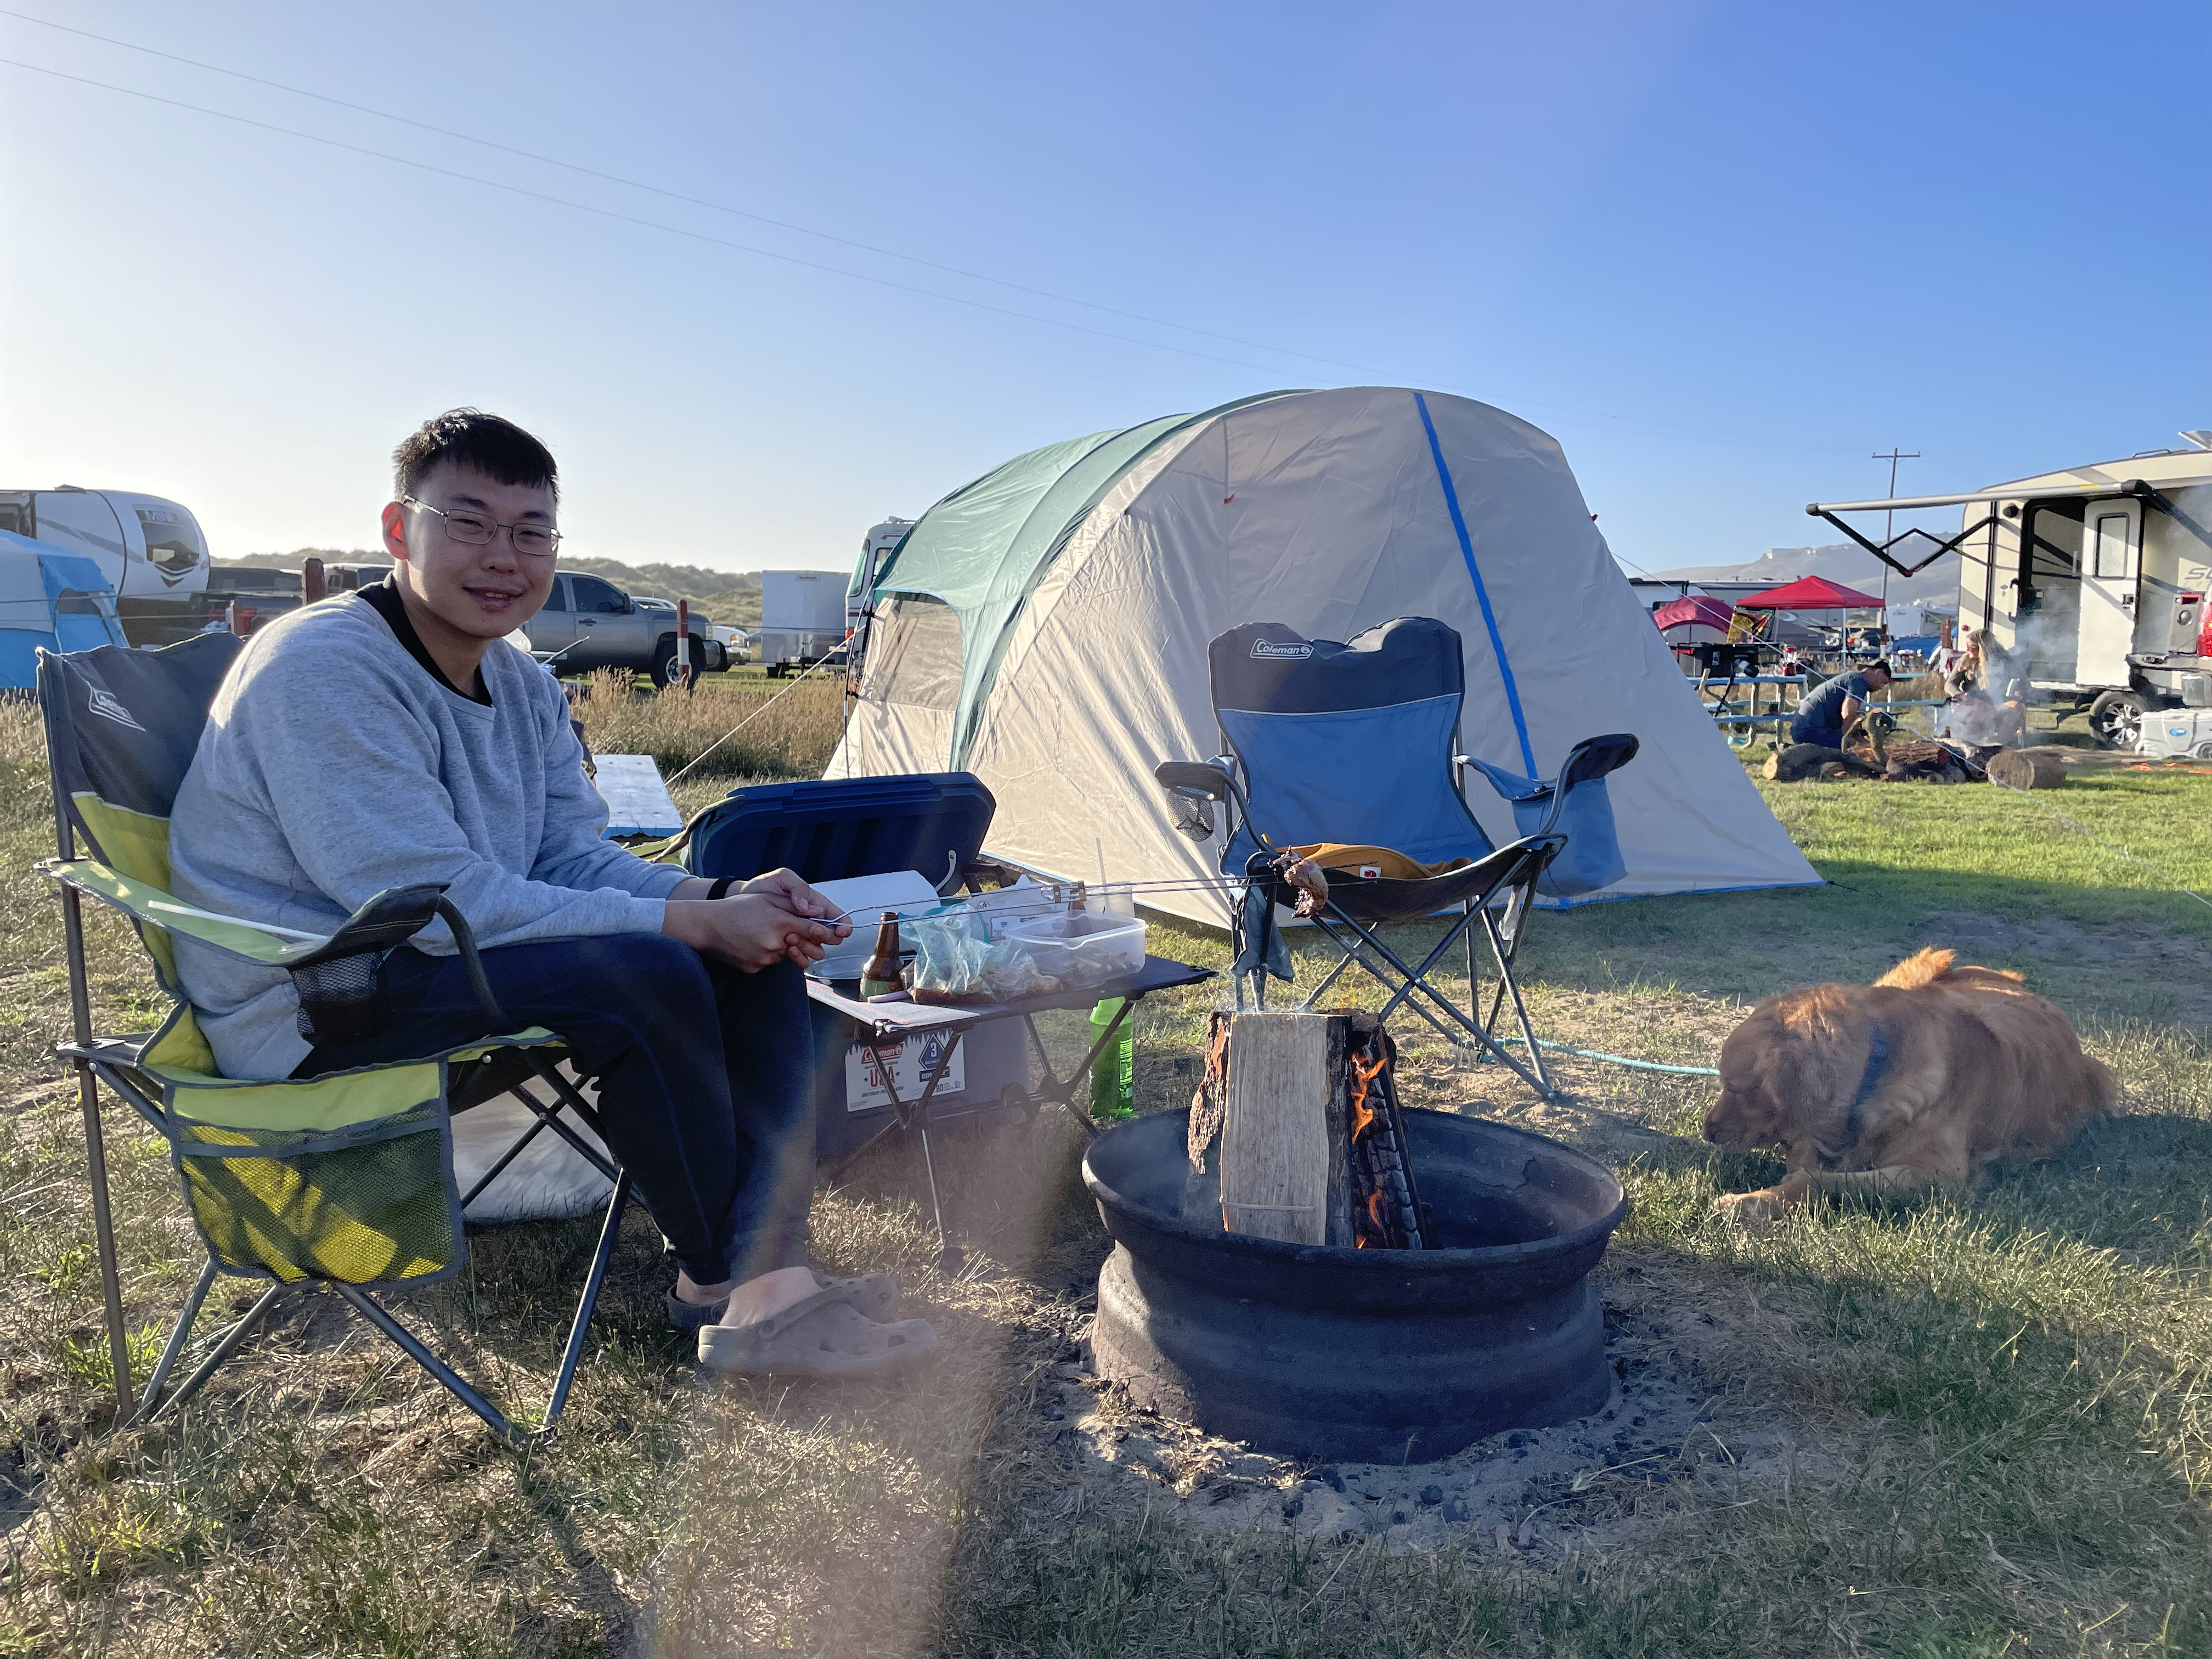

In [46]:
Display(filename=filename, width=300, height=200)  # Adjust these values as needed

In [47]:
metadata = get_image_metadata(filename)
gps_data = get_image_gps_data(filename)
latitude = dms_to_decimal(*gps_data['GPSLatitude'], gps_data['GPSLatitudeRef'])
longitude = dms_to_decimal(*gps_data['GPSLongitude'], gps_data['GPSLongitudeRef'])
location_info = get_location_by_coordinates(latitude, longitude)

In [48]:
location_info

{'place_id': 310087457,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 484667655,
 'lat': '38.241313720373',
 'lon': '-122.96733356768247',
 'class': 'highway',
 'type': 'service',
 'place_rank': 27,
 'importance': 0.07500999999999991,
 'addresstype': 'road',
 'name': 'Marine View Drive',
 'display_name': 'Marine View Drive, Dillon Beach, Marin County, California, 94953, United States',
 'address': {'road': 'Marine View Drive',
  'hamlet': 'Dillon Beach',
  'county': 'Marin County',
  'state': 'California',
  'ISO3166-2-lvl4': 'US-CA',
  'postcode': '94953',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['38.2348050', '38.2453912', '-122.9693454', '-122.9659405']}

In [66]:
metadata

{'GPSInfo': {'GPSLatitudeRef': 'N',
  'GPSLatitude': (38.0, 14.0, 28.22),
  'GPSLongitudeRef': 'W',
  'GPSLongitude': (122.0, 58.0, 0.88),
  'GPSAltitudeRef': b'\x00',
  'GPSAltitude': 1.8061141488544443,
  'GPSTimeStamp': (20.0, 0.0, 0.0),
  'GPSSpeedRef': 'K',
  'GPSSpeed': 0.0,
  'GPSImgDirectionRef': 'T',
  'GPSImgDirection': 329.97679112008075,
  'GPSDestBearingRef': 'T',
  'GPSDestBearing': 329.97679112008075,
  'GPSDateStamp': '2022:07:17',
  'GPSHPositioningError': 4.748674744414994},
 'ResolutionUnit': 2,
 'ExifOffset': 226,
 'Make': 'Apple',
 'Model': 'iPhone 12',
 'Software': '15.5',
 'Orientation': 1,
 'DateTime': '2022:07:16 19:09:10',
 'YCbCrPositioning': 1,
 'XResolution': 72.0,
 'YResolution': 72.0,
 'HostComputer': 'iPhone 12',
 'ExifVersion': b'0232',
 'ComponentsConfiguration': b'\x01\x02\x03\x00',
 'ShutterSpeedValue': 12.30221195113899,
 'DateTimeOriginal': '2022:07:16 19:09:10',
 'DateTimeDigitized': '2022:07:16 19:09:10',
 'ApertureValue': 1.3561438092556088,
 'B

In [133]:
def generate_journal(filename):
    
    metadata = get_image_metadata(filename)
    gps_data = get_image_gps_data(filename)
    latitude = dms_to_decimal(*gps_data['GPSLatitude'], gps_data['GPSLatitudeRef'])
    longitude = dms_to_decimal(*gps_data['GPSLongitude'], gps_data['GPSLongitudeRef'])
    location_info = get_location_by_coordinates(latitude, longitude)
    
    prompt = f"""
    My name is Site Wang. I work in the tech industry and is a AI enthusiastic. 
    I love my life and is very excited about all the technology development in the world. 
    We have a Golden Retriever called Tim and a Orange Cat called Gulu. 
    
    This was a picture taken at: 
    {location_info}
    
    Here are some more information about it: 
    {metadata}
    
    Based on the above information and the picture provided, can you write a personal journal. 
    Understand what is in the pictutre in the journal. It is okay to keep the imagination open. 
    Be creative, personal, and realistic. 
    """
    
    img = PIL.Image.open(filename)
    vision_model = genai.GenerativeModel('gemini-pro-vision')
    response = vision_model.generate_content([prompt, img])
    print(filename)
    print(response.text)
    print('-------')
    return prompt, response.text

In [117]:
prompt, resposne = generate_journal(filename)

media/IMG_0062.jpeg
 July 17, 2022

Dear Journal,

Today, we went camping at Dillon Beach. It was a beautiful day and we had a lot of fun. We set up our tent, went for a hike, and then roasted marshmallows over the campfire.

The picture I took is of me sitting in a chair by the campfire. I'm holding a marshmallow on a stick, and I'm looking at the fire. I'm smiling because I'm happy and relaxed. I'm enjoying spending time with my family and friends, and I'm grateful for the opportunity to be here.

I love camping. It's a great way to connect with nature and spend time with loved ones. It's also a lot of fun to rough it and live without the comforts of home.

I'm so glad we decided to go camping this weekend. It's been a wonderful experience, and I'm sure we'll make memories that will last a lifetime.

Love,

Site
-------


In [134]:
journal = {}

for f in tqdm(filenames_list):
    fn = f'media/{f}'
    try:
        prompt, response = generate_journal(fn)
        journal[fn] = {'prompt': prompt, 'response': response}
        time.sleep(30)
    except Exception as e:
        print(f"Failed {fn} due to {e}")

  0%|                                                                                                                                            | 0/54 [00:00<?, ?it/s]

media/IMG_0062.jpeg
 July 17, 2022

Dear Journal,

Today, we went camping at Dillon Beach. It was a beautiful day and we had a lot of fun. We set up our tent, had a campfire, and roasted marshmallows. Tim and Gulu loved running around the beach and playing in the sand. It was so peaceful and relaxing. I love spending time with my family and being in nature.

I'm so grateful for this life. I have a wonderful husband, two beautiful dogs, and a great job. I'm living my dream.

I can't wait to see what tomorrow brings.

Love,

Site
-------


  2%|██▍                                                                                                                                 | 1/54 [00:41<36:50, 41.71s/it]

media/IMG_5807.jpeg
 Date: 2023-01-12

Time: 08:00:32

Location: 2768 El Sobrante Street, Santa Clara, CA 95051

I just took a picture of my house. It's a beautiful day outside, and I'm feeling grateful for everything I have. I'm especially grateful for my family and friends, who have always been there for me.

I'm also grateful for my home. It's a place where I can feel safe and loved. It's a place where I can relax and be myself.

I know that I'm lucky to have a home, and I'm committed to making it a place where everyone feels welcome. I want it to be a place where people can come to feel loved and supported.

I'm also committed to making my home a place where I can grow and learn. I want to be a better person, and I know that I can do that by surrounding myself with people who will support me.

I'm excited about the future. I know that I can achieve anything I set my mind to, and I'm grateful for the opportunity to live in a place where I can pursue my dreams.
-------


  4%|████▉                                                                                                                               | 2/54 [01:21<35:00, 40.40s/it]

media/IMG_5041.jpeg
 Dear diary,

Today, my husband and I hiked to the summit of Haleakala, a dormant volcano on the island of Maui. It was an incredible experience!

We started our hike at 3am, in the dark. The trail was steep and challenging, but we were determined to make it to the top. As we hiked, we could see the stars above us and the lights of Kahului town below us.

After about 2 hours, we reached the summit. We were just in time to see the sunrise. It was the most beautiful sight I've ever seen. The sky was ablaze with color and the clouds were glowing.

We spent the next hour exploring the summit. We walked around the crater and took in the stunning views. We also learned about the history of the volcano and the native Hawaiian culture.

It was an unforgettable experience. I'm so glad we decided to hike to the summit of Haleakala. It was a once-in-a-lifetime adventure.

I'm so grateful to be able to live in such a beautiful place. I love Hawaii and I love my life here.

I'm 

  6%|███████▎                                                                                                                            | 3/54 [02:00<34:04, 40.09s/it]

Failed media/69318678834__EB5B601C-C8A1-485A-9271-6F4C21D99644.jpeg due to string indices must be integers, not 'str'
media/IMG_5240.jpeg
 Dear diary,

Today was a beautiful day. I was walking around my neighborhood when I saw a really cool lizard. I've never seen one like it before. It was bright green with a yellow belly and a red tail. I think it's a gecko. I did a quick search on my phone and it looks like I'm right. It's a day gecko, native to Hawaii. I'm so glad I got to see one in the wild!

I continued on my walk and I saw a few more geckos. They were all different colors and sizes. I learned that geckos are able to change their color to match their surroundings. That's so cool! I also learned that geckos are able to stick to walls and ceilings. They have tiny hairs on their feet that help them to grip onto surfaces. I'm so glad I learned about geckos today. They are such amazing creatures!

I'm so grateful to live in a place where I can see so many different kinds of animals. 

  9%|████████████▏                                                                                                                       | 5/54 [02:40<23:27, 28.73s/it]

Failed media/IMG_0901.MOV due to cannot identify image file '/Users/sitewang/journal/media/IMG_0901.MOV'
media/IMG_7092.jpeg
 July 7th, 2023

Dear Diary,

Today was an amazing day! We went to Disneyland! It was my first time there, and I was so excited. We got there early in the morning, and we were able to ride all the rides without having to wait in line for too long. My favorite ride was Space Mountain. It was so thrilling!

We also watched the fireworks show at night. It was so beautiful! It was the perfect way to end a perfect day.

I'm so glad we went to Disneyland. It was a truly magical experience. I can't wait to go back again someday.

Love,

Site
-------


 13%|█████████████████                                                                                                                   | 7/54 [03:18<19:05, 24.38s/it]

media/IMG_1054.jpeg
 Dear Diary,

Today was a beautiful day. The sun was shining, the birds were singing, and I was feeling good. I decided to take Tim and Gulu for a walk to the park.

We walked for a while and then we came to a swimming pool. Tim loves to swim, so I decided to let him go for a swim. He had so much fun! He swam around and around and played with the other dogs.

After a while, Tim got tired and came out of the pool. He shook himself off and then he lay down on the grass to dry off. Gulu came over and curled up next to him. They looked so cute together!

I sat down on the grass and watched them. I thought about how much I love my animals. They are my best friends. I don't know what I would do without them.

I closed my eyes and listened to the sound of the birds singing. I felt so peaceful and happy. I knew that this was a perfect day.

I opened my eyes and looked at Tim and Gulu. They were both sleeping soundly. I smiled and then I closed my eyes again. I drifted off t

 15%|███████████████████▌                                                                                                                | 8/54 [03:58<21:31, 28.07s/it]

Failed media/IMG_1039.MOV due to cannot identify image file '/Users/sitewang/journal/media/IMG_1039.MOV'
media/IMG_5685.jpeg
 January 5, 2023

Dear Diary,

Today was an amazing day! I met up with some friends for dinner at a new restaurant in town. The food was delicious and the company was even better.

I'm so grateful for my friends. They make my life so much richer. I'm also grateful for the opportunity to live in such a beautiful place. The Bay Area is truly a special place.

I'm looking forward to what the new year will bring. I have a lot of goals and dreams, and I'm excited to start working towards them. I know that with the support of my friends and family, I can achieve anything I set my mind to.

I'm also excited to see what new technologies will emerge in the coming year. I'm a big fan of technology, and I love seeing how it can be used to improve our lives. I'm especially interested in artificial intelligence and machine learning. I think these technologies have the potenti

 19%|████████████████████████▎                                                                                                          | 10/54 [04:39<18:14, 24.86s/it]

media/IMG_0891.jpeg
 March 20, 2024

Dear Diary,

Today, I attended the NVIDIA GTC conference at the San Jose McEnery Convention Center. It was an amazing experience! I got to hear from some of the top experts in the field of artificial intelligence, and I learned a lot about the latest developments in the field.

One of the highlights of the conference was a talk by Dr. Lisa Su, the CEO of AMD. She spoke about the importance of AI in the modern world, and she shared her vision for the future of the technology. She said that AI has the potential to revolutionize many industries, from healthcare to transportation to finance. She also talked about the importance of ethics in AI development, and she urged the audience to use AI for good.

I was also impressed by a talk by Dr. Andrew Ng, the founder of Coursera. He spoke about the importance of lifelong learning, and he encouraged the audience to embrace new technologies. He said that AI is going to change the way we work and live, and tha

 20%|██████████████████████████▋                                                                                                        | 11/54 [05:20<20:29, 28.59s/it]

media/IMG_5922.jpeg
 Dear diary,

I'm still in shock over what happened today. I was just getting ready for bed when I heard a loud crash from the bathroom. I ran in to find that the entire ceiling had collapsed!

I couldn't believe my eyes. The water from the toilet had leaked and caused the ceiling to rot. The whole thing came down in a heap of plaster and debris.

I was so scared. I didn't know what to do. I called my husband at work, and he came home right away. He started cleaning up the mess, and I called the plumber.

The plumber came and took a look at the damage. He said that the leak had been going on for a while, and that it had caused a lot of damage. He said that we would need to have the entire bathroom remodeled.

I was so upset. I couldn't believe that something like this could happen. We had just remodeled the bathroom a few years ago.

I didn't know how we were going to afford to pay for this. We didn't have any money saved up, and we were already struggling to make e

 22%|█████████████████████████████                                                                                                      | 12/54 [06:04<22:37, 32.32s/it]

media/IMG_0327.jpeg
 Dear Diary,

Today, I took a picture of my garden. I've been working on it for a few months now, and I'm finally starting to see it come together. I've planted a variety of flowers and shrubs, and I'm hoping to add some more in the spring. I've also been working on adding some hardscaping, like the path that you can see in the picture.

I'm really enjoying the process of creating my own garden. It's a lot of work, but it's also very rewarding. I love seeing the plants grow and change over time. I also enjoy spending time in the garden, just relaxing and enjoying the beauty of nature.

I think that my garden is a reflection of who I am. I'm a creative person, and I love to express myself through my work. I'm also a nature lover, and I enjoy spending time outdoors. My garden is a place where I can combine my two passions.

I'm really proud of my garden, and I'm excited to see how it continues to grow and change in the years to come. I think that it's a beautiful spac

 24%|███████████████████████████████▌                                                                                                   | 13/54 [06:44<23:29, 34.37s/it]

media/IMG_4718.jpeg
 August 28, 2022

Dear Diary,

Today, we went camping at Kaspian Campground in the Tahoe National Forest. It was a beautiful day and the campground was located in a quiet, secluded area. We set up our tent and then went for a hike in the nearby forest. After dinner, we roasted marshmallows over the campfire and told stories. It was a perfect day and I'm so glad we decided to go camping.

I love camping because it's a great way to connect with nature and spend time with loved ones. It's also a lot of fun to rough it and live without the modern conveniences of home. I think it's important to unplug from technology and spend time in the wilderness every once in a while. It's a good way to relax and appreciate the simple things in life.

I'm so glad we decided to go camping this weekend. It was a much-needed break from the hustle and bustle of everyday life. I'm already looking forward to our next camping trip.

Love,

Site
-------


 26%|█████████████████████████████████▉                                                                                                 | 14/54 [07:23<23:45, 35.63s/it]

media/IMG_0521.jpeg
 Dear Diary,

Today was a great day! I woke up early and took Tim for a walk to Crowley Avenue. It's a beautiful park with a swimming pool, and we had a lot of fun playing fetch. After that, we went home and had breakfast with Gulu.

In the afternoon, I worked on a few projects and then went for a run. In the evening, I watched a movie with my wife and had a few drinks. It was a perfect day!

I'm so grateful for everything I have in my life. I have a loving wife, two beautiful pets, and a great job. I'm also very lucky to live in such a beautiful place.

I can't wait to see what tomorrow brings!

Love,

Site
-------


 28%|████████████████████████████████████▍                                                                                              | 15/54 [08:01<23:31, 36.19s/it]

media/IMG_7703.jpeg
 Dear Diary,

Today was a beautiful day. The sun was shining, the birds were singing, and I was spending time with my friends and family. We had a barbecue in the backyard and played games. It was so much fun.

I love spending time with my friends and family. They are the most important people in my life. I am so grateful to have them in my life.

I am also grateful for the opportunity to live in such a beautiful place. The Bay Area is truly a special place. I love the weather, the scenery, and the people. I feel so lucky to live here.

I am so happy with my life right now. I have everything I could ever want. I am grateful for every moment.

Love,

Site
-------


 30%|██████████████████████████████████████▊                                                                                            | 16/54 [08:40<23:32, 37.18s/it]

media/IMG_0547.jpeg
 Dear diary,

Today was a beautiful day and I decided to take Tim for a walk on Canyon Trail. We started our walk at 8:13 AM and the weather was perfect. The sun was shining and there was just enough breeze to keep us cool. Tim was so excited to be out of the house and he was running and jumping all over the place.

We walked for about an hour and a half and we saw some amazing scenery. The trail was surrounded by lush green trees and we could see for miles in every direction. We even saw a few deer!

Tim loved exploring the new sights and sounds. He was especially interested in the squirrels and birds. He would chase them up the trees and try to catch them.

We had such a great time on our walk and I'm so glad we decided to go. It was a perfect way to spend a beautiful day with my best friend.

After our walk, we went home and had lunch. Then, we took a nap in the sun. It was the perfect way to end a perfect day.

I'm so grateful for my life. I have a wonderful hus

 31%|█████████████████████████████████████████▏                                                                                         | 17/54 [09:21<23:28, 38.06s/it]

media/IMG_7390.jpeg
 Date: 2023-08-13

Location: Carmen's Legal Resource Center, 726 Villa Street, Mountain View, CA 94041

Time: 14:40:02

Camera: iPhone 12

Settings: 4.2mm, f/1.6, 1/120s, ISO 80

I took this picture of a bowl of noodles at Carmen's Legal Resource Center in Mountain View, CA. The noodles were delicious and the broth was flavorful. The restaurant was busy, but the service was good. I enjoyed my meal and I would definitely come back again.

I was in Mountain View for a meeting with a client. After the meeting, I decided to walk around the city and explore. I found Carmen's Legal Resource Center and decided to stop in for lunch. I'm glad I did! The food was great and the atmosphere was relaxed.

I'm grateful for the opportunity to travel and meet new people. I'm also grateful for the opportunity to experience different cultures and cuisines. I'm learning so much about the world and I'm becoming a more open-minded person.

I'm excited to see what the future holds. I'm ho

 33%|███████████████████████████████████████████▋                                                                                       | 18/54 [10:00<23:08, 38.58s/it]

Failed media/IMG_6003.JPG due to string indices must be integers, not 'str'
Failed media/IMG_0961.MOV due to cannot identify image file '/Users/sitewang/journal/media/IMG_0961.MOV'
media/IMG_0033.jpeg
 July 1, 2022

Dear Diary,

Today, I was driving home from work when I saw the most amazing thing. There was a huge truck in front of me, and it was covered in decals. The decals said things like "Brother Movers" and "We'll move you anywhere." I was so intrigued that I had to take a picture of it.

I did a little research on the company, and it turns out that they're a moving company. They're based in California, and they have offices all over the country. They offer a variety of services, including packing, loading, and unloading. They also offer storage services.

I'm so glad that I saw this truck today. It's a reminder that there are still good people in the world. People who are willing to help others. I'm also glad that I learned about Brother Movers. They're a great company, and I'm

 39%|██████████████████████████████████████████████████▉                                                                                | 21/54 [10:41<13:33, 24.66s/it]

media/IMG_4932.jpeg
 Dear diary,

Today was an amazing day! I spent the whole day at the beach with my family. We swam, sunbathed, and built sandcastles. It was so much fun!

I love spending time at the beach. It's so relaxing and peaceful. I can just sit and listen to the waves crash against the shore. It's the perfect place to clear my head and forget about all my troubles.

I'm so grateful to have a family that loves spending time together. We're always laughing and having fun. I know that I'm lucky to have them in my life.

I'm so glad that I took this picture. It captures a perfect moment in time. I'll be able to look back at this picture and remember all the fun we had today.

I can't wait to come back to the beach again soon. It's my favorite place to be.
-------


 41%|█████████████████████████████████████████████████████▎                                                                             | 22/54 [11:21<14:48, 27.76s/it]

media/IMG_4621.jpeg
 Date: 2022-08-20

Time: 16:40:06

Location: San Francisco Armory

I took this picture with my iPhone 12. I was visiting the San Francisco Armory with my wife and our two kids. We were having a great time exploring the city, and we decided to stop by the armory to see what was inside.

The armory is a beautiful building, and it's full of history. It was built in 1894, and it's been used for a variety of purposes over the years. It's currently home to the San Francisco Police Department, and it's also a popular tourist destination.

We spent a few hours exploring the armory, and we learned a lot about its history. We also had a chance to see some of the exhibits, which were very interesting.

After we finished exploring the armory, we decided to take a picture in front of the sign. We had a great time, and we're glad we decided to visit the armory.

I'm so glad that we were able to visit the San Francisco Armory. It's a beautiful building, and it's full of history. W

 43%|███████████████████████████████████████████████████████▊                                                                           | 23/54 [12:01<15:53, 30.74s/it]

Failed media/IMG_0662.JPG due to string indices must be integers, not 'str'
media/IMG_0136.jpeg
 Today, I ran the Berkeley Half Marathon. This was my first half marathon, and I was excited but also nervous. I had been training for months, and I was ready to see what I could do.

The race started at 7:00am, and it was a beautiful day. The sun was shining, and the air was cool. I felt good as I started running, and I quickly settled into a comfortable pace.

The first few miles of the race were easy, but the hills started to get to me around mile 6. I began to slow down, and I started to feel like I might not be able to finish. But I kept going, and I eventually made it to the top of the hill.

The last few miles of the race were tough, but I kept pushing myself. I knew that I was almost there, and I didn't want to give up. I finally crossed the finish line, and I was so happy that I had finished.

I ran the half marathon in 2:32:17, and I was proud of my time. I had set a goal to finish

 46%|████████████████████████████████████████████████████████████▋                                                                      | 25/54 [12:43<13:00, 26.92s/it]

Failed media/IMG_0393.MOV due to cannot identify image file '/Users/sitewang/journal/media/IMG_0393.MOV'
media/IMG_0989.jpeg
 2024-03-21

Dear Diary,

Today was an amazing day! I attended a conference on the future of AI and robotics. I saw some incredible demos of new technologies that are being developed. One of the most impressive was a robot that could walk and talk just like a human. It was so lifelike that it was hard to believe that it wasn't real.

I also heard some fascinating talks about the future of AI. One speaker said that AI is going to revolutionize the way we live and work. He said that AI will be used to create new products and services, and it will also be used to solve some of the world's biggest problems, such as climate change and poverty.

I'm so excited about the future of AI. I think it has the potential to make the world a better place.

After the conference, I went for a walk around the city. I saw a new building that is being constructed. It's a huge buildin

 50%|█████████████████████████████████████████████████████████████████▌                                                                 | 27/54 [13:25<11:07, 24.70s/it]

media/IMG_3864.jpeg
 Dear diary,

Today, I visited a pottery studio called Higher Fire. It's located in the SoFA district of San Jose, and it's a great place to see local artists at work.

The studio is housed in a large, open space with high ceilings. There are several work areas, each with its own pottery wheel and kiln. The walls are lined with shelves displaying finished pieces, and there's a small gallery in the front of the studio where you can buy work from local artists.

I spent a while talking to the owner, who is a very friendly and knowledgeable woman. She told me about the different types of pottery that she makes, and she showed me how to throw a pot on the wheel. It was a lot harder than it looks!

I also met a few of the other artists who work at the studio. They were all very welcoming, and they shared their stories with me. It was inspiring to hear about their different backgrounds and how they came to be interested in pottery.

I left the studio feeling inspired and 

 52%|███████████████████████████████████████████████████████████████████▉                                                               | 28/54 [14:06<12:06, 27.94s/it]

media/IMG_0383.jpeg
 12/23/2023

Dear Diary,

Today, I took a drive along the coast with my family. We started out in the morning, and the sun was shining brightly. The sky was a clear blue, and the water was a deep blue. We could see for miles in every direction.

We drove for a few hours, and we stopped at a few different places along the way. We had lunch at a small cafe, and we walked on the beach. We also stopped at a few different overlooks, and we took some pictures.

The scenery was beautiful, and it was a perfect day for a drive. We had a lot of fun, and I'm glad we decided to go.

I'm including a picture that I took of the sunset. It's not the best picture, but it captures the beauty of the moment.

I'm also including some information about the picture. I found it interesting to learn about the different settings that were used to take the picture.

I hope you enjoy the picture and the information about it.

Love,

Site
-------


 54%|██████████████████████████████████████████████████████████████████████▎                                                            | 29/54 [14:44<12:37, 30.28s/it]

media/IMG_0803.jpeg
 I am so excited! I am at the NVIDIA GTC conference in San Jose, California. This is my first time at GTC, and I am really looking forward to learning about all the latest advances in AI and deep learning.

I just took this picture outside the conference center. I am really impressed by the size and scale of the event. There are thousands of people here from all over the world. It is really exciting to be a part of this community.

I am also looking forward to seeing all the new products and technologies that are being announced at the conference. I am sure that I will learn a lot and that I will be inspired to come up with new ideas for my own work.

I am really grateful for the opportunity to be here at GTC. This is a once-in-a-lifetime experience, and I am going to make the most of it.

I can't wait to see what the future holds for AI and deep learning. I am sure that it is going to be amazing!
-------


 56%|████████████████████████████████████████████████████████████████████████▊                                                          | 30/54 [15:22<12:51, 32.16s/it]

media/IMG_0157.jpeg
 Date: 2022-10-16

Time: 15:46:29

Location: Indiana Convention Center

I was at the Indiana Convention Center for a conference today. I was taking a picture of the presentation slide when I noticed something strange. There was a man in the audience who was staring at me. He had a very intense look on his face, and he was wearing a long black coat. I felt a chill run down my spine, and I quickly looked away.

I tried to forget about the man, but I couldn't. I kept thinking about his eyes and the way he was staring at me. I started to feel paranoid, and I wondered if he was following me.

After the conference, I went back to my hotel room. I tried to relax, but I couldn't stop thinking about the man. I finally decided to call the police.

The police came and took a statement from me. They said they would look into it, but they didn't seem very concerned. I didn't feel any better, and I spent the rest of the night tossing and turning.

The next morning, I woke up earl

 59%|█████████████████████████████████████████████████████████████████████████████▋                                                     | 32/54 [16:14<10:20, 28.18s/it]

media/IMG_0792.jpeg
Failed media/IMG_0792.jpeg due to The `response.text` quick accessor only works when the response contains a valid `Part`, but none was returned. Check the `candidate.safety_ratings` to see if the response was blocked.
media/IMG_0252.jpeg
 Dear Diary,

Today was a beautiful day. I took a walk in the park with my Golden Retriever, Tim, and my Orange Cat, Gulu. We had a lot of fun playing fetch and exploring the new sights and sounds.

After our walk, we went to Apple Park for dinner. I had the best burger I've ever had! The fries were amazing too.

After dinner, we went to see a movie. We saw the new Star Wars movie, and it was so good! The special effects were amazing, and the story was really engaging.

We had a great time together. It was a perfect day.

I'm so grateful for my life. I have a loving family, a great job, and two amazing pets. I'm so lucky!

I can't wait to see what tomorrow brings.

Love,

Site
-------


 61%|████████████████████████████████████████████████████████████████████████████████                                                   | 33/54 [16:53<10:56, 31.25s/it]

media/IMG_0046.jpeg
 Dear Diary,

Today was a beautiful day. The sun was shining, the birds were singing, and the flowers were blooming. I took Tim and Gulu for a walk along Marine View Drive. We stopped to take a picture at a scenic overlook. The view was amazing. We could see the ocean, the mountains, and the trees.

Tim and Gulu loved running around and playing in the grass. They were so happy. I'm so glad I have them in my life. They make me smile every day.

After our walk, we went home and had lunch. I made a delicious salad with fresh vegetables from the garden. It was so good.

In the afternoon, I took a nap. I was so tired from our walk. When I woke up, I felt refreshed and ready to go.

I decided to go for a bike ride. I rode along the beach. The wind was in my hair and the sun was on my face. It was so peaceful.

When I got home, I was exhausted. I took a shower and then I went to bed. I had a wonderful day.

I'm so grateful for my life. I have a loving family, good friends,

 63%|██████████████████████████████████████████████████████████████████████████████████▍                                                | 34/54 [17:34<11:19, 33.96s/it]

Failed media/sd1661656864_2.mp4 due to cannot identify image file '/Users/sitewang/journal/media/sd1661656864_2.mp4'
Failed media/IMG_6934.MOV due to cannot identify image file '/Users/sitewang/journal/media/IMG_6934.MOV'
media/IMG_0267.jpeg
 Dear diary,

Today, I found a leak in the attic. It was a small leak, but it was enough to cause damage to the ceiling in the kitchen. I called a plumber to come and fix it, and he said that it would be a simple repair.

I was relieved that the leak was found and would be fixed, but I was also a little bit worried about the damage that had been done. The ceiling in the kitchen was going to have to be replaced, and I didn't know how much that was going to cost.

I decided to call my insurance company to see if they would cover the damage. They said that they would, but they would only cover the cost of the materials. I would have to pay for the labor myself.

I was disappointed that the insurance company wouldn't cover the cost of the labor, but I 

 69%|█████████████████████████████████████████████████████████████████████████████████████████▊                                         | 37/54 [18:15<06:29, 22.89s/it]

media/IMG_7218.jpeg
 July 14, 2023

Dear Diary,

Today, we went camping at Mazama Campground in Crater Lake National Park. It was a beautiful day and we had a lot of fun. We hiked to the top of a mountain and had a picnic lunch. Then, we went swimming in the lake. Tim loved swimming in the lake, he kept chasing after the ball that I threw for him. Gulu was not so much a fan of the water, he stayed on the shore and watched us. 

After dinner, we roasted marshmallows over the campfire and told stories. It was a perfect day and I'm so glad we went camping.

I love spending time with my family and friends in the great outdoors. It's so peaceful and relaxing. I always feel refreshed after a camping trip.

I'm so grateful for the opportunity to live in such a beautiful place. I love Oregon and all the natural beauty it has to offer. I'm also grateful for my family and friends who make every adventure more special.

I can't wait to go camping again soon. It's my favorite way to spend time in 

 70%|████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 38/54 [18:54<06:59, 26.24s/it]

media/IMG_7537.jpeg
 Dear Diary,

Today, we went to Tahoe East Shore Trail for a walk. It was a beautiful day and the views were amazing. The trail was a little crowded, but it was still a lot of fun.

We brought our Golden Retriever, Tim, and our Orange Cat, Gulu, with us. They both loved running around and exploring the new sights and smells.

We stopped for a picnic lunch at one of the overlooks. The food was delicious and the views were even better.

After lunch, we continued on our walk. We eventually made it to the end of the trail, where we turned around and headed back.

We had a great time on our walk. It was a perfect day to spend with family and friends.

I'm so glad we decided to go to Tahoe East Shore Trail. It's a beautiful place that I'll never forget.

Love,

Site
-------


 72%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 39/54 [19:34<07:20, 29.39s/it]

media/IMG_5506.jpeg
 Dear diary,

Today was an amazing day! My husband and I went to Copper Mountain for a ski trip. We had so much fun skiing and snowboarding down the slopes. After a long day of skiing, we went to a restaurant called "Bar & Grill" for dinner. The food was delicious and the service was great. We had a table with a beautiful view of the snow-capped mountains.

I'm so glad we decided to come to Copper Mountain for our ski trip. It was the perfect way to spend a winter day. I can't wait to come back again next year.

I'm so grateful for my husband. He's the best ski buddy a girl could ask for. He's always patient with me when I'm learning new things, and he always makes me laugh. I love spending time with him.

I'm also grateful for our dog, Tim, and our cat, Gulu. They're the best pets a person could ask for. They're always there to greet us with wagging tails and purring. They make our lives so much happier.

I'm so lucky to have such a wonderful life. I'm grateful for

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████                                  | 40/54 [20:13<07:24, 31.73s/it]

media/IMG_5219.jpeg
 Dear diary,

Today was an amazing day! We went to Wailea Beach in Maui, Hawaii. The water was crystal clear and the sand was white and soft. We swam, sunbathed, and built sandcastles. It was so much fun!

We had lunch at a little restaurant on the beach. The food was delicious and the views were incredible. After lunch, we took a walk along the beach. We saw some amazing sea turtles and fish.

We had such a great time at Wailea Beach. It was the perfect day to relax and enjoy the beautiful scenery.

I'm so glad we decided to come to Hawaii. This is truly a paradise. I can't wait to explore more of this beautiful island.

Love,

Site
-------


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 41/54 [20:51<07:10, 33.15s/it]

media/IMG_0172.jpeg
 I took this picture with my friend, Tim, on a recent trip to Indianapolis. We were visiting the Soldiers' and Sailors' Monument, which is a beautiful tribute to those who have served our country. The monument is located in the heart of downtown Indianapolis, and it's a popular spot for tourists and locals alike.

I'm so glad we had a chance to visit the Soldiers' and Sailors' Monument. It's a reminder of the sacrifices that our military members have made, and it's a place where we can come to honor their service.

I'm also glad that I got to share this experience with Tim. He's a true friend, and I'm grateful for his support.

I hope that you'll have a chance to visit the Soldiers' and Sailors' Monument someday. It's a truly special place.
-------


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 42/54 [21:29<06:54, 34.51s/it]

media/IMG_7013.jpeg
 July 6, 2023

Dear Diary,

I went to see the musical "Into the Woods" at the Ahmanson Theatre last night with my friends, Tim and Gulu. It was an amazing show! The music was beautiful, the acting was superb, and the story was heartwarming and thought-provoking.

I loved the way the show explored the themes of love, loss, and sacrifice. The characters were all so well-developed and relatable, and I found myself rooting for them all. The story was also very clever and engaging, and I was never bored for a moment.

I'm so glad I went to see this show. It was a truly unforgettable experience, and I highly recommend it to anyone who loves musicals.

After the show, we went out for dinner at a nearby restaurant. We had a great time talking about the show and laughing over our favorite parts. It was a perfect way to end a perfect evening.

I'm so grateful for my friends, Tim and Gulu. They're always up for an adventure, and they always make me laugh. I'm so lucky to have 

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 43/54 [22:10<06:39, 36.31s/it]

media/IMG_5429.jpeg
 Dear Diary,

Today was a beautiful day. I woke up early and took a walk around the neighborhood with Tim and Gulu. The sun was shining, the birds were singing, and the flowers were blooming. It was a perfect day to be outside.

After our walk, I came home and made breakfast for my family. I made pancakes, bacon, and eggs. It was a delicious breakfast and we all enjoyed it.

After breakfast, I sat down to write in my journal. I've been thinking a lot about the future lately. I'm not sure what I want to do with my life, but I know that I want to make a difference in the world.

I've been thinking about starting a blog or a podcast to share my thoughts and ideas with others. I'm also thinking about volunteering my time to help people in need. I know that I can make a difference, even if it's just a small one.

I'm excited about the future. I know that I can achieve anything I set my mind to. I'm going to make a difference in the world, and I'm going to start by living

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 44/54 [22:50<06:13, 37.33s/it]

media/IMG_0282.jpeg
 Dear diary,

Today was a beautiful day. The sun was shining, the birds were singing, and the flowers were blooming. I spent the day in my backyard, enjoying the warm weather and the company of my family.

We had a barbecue in the afternoon, and I made my famous potato salad. Everyone loved it! After dinner, we sat around the fire pit and roasted marshmallows. It was so much fun!

I love spending time in my backyard. It's the perfect place to relax and enjoy the outdoors. I'm so glad that we have this space.

I'm also glad that I have such a wonderful family. They make my life so much richer. I love them all so much.

I'm so grateful for this day. It was a perfect day.

Love,

Site
-------


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 45/54 [23:28<05:39, 37.72s/it]

media/IMG_5716.jpeg
 Dear Diary,

Today, I went to a home improvement store with my husband to pick out some paint colors for our new house. We're still in the early stages of planning, but it's so exciting to start thinking about all the possibilities.

We spent a long time looking at all the different colors and samples. There were so many to choose from, and it was hard to narrow it down. But eventually, we found a few that we really liked.

One of the colors we're considering is a light gray for the living room. It's a warm and inviting color that would be perfect for relaxing and entertaining guests. We're also thinking about a blue-gray for the kitchen. It's a bright and cheerful color that would make cooking and eating more enjoyable.

For the bedrooms, we're leaning toward a more neutral palette. We're thinking about a light beige for the master bedroom and a soft green for the guest room. These colors are both calming and serene, and they would create a relaxing atmosphere for

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 46/54 [24:09<05:08, 38.58s/it]

Failed media/65490d8c487102a74421cf4154f2083f.jpg due to 'GPSLatitude'
media/IMG_7746.jpeg
 Dear diary,

Today was a great day! My husband and I made dumplings together for the first time. We had so much fun learning how to make them, and they turned out delicious! We also had a lot of laughs along the way.

I'm so glad that we decided to try something new together. It was a great way to bond and spend some quality time together. I'm already looking forward to our next cooking adventure!

I'm so grateful for my husband. He's the most amazing man I know. He's always there for me, no matter what. He makes me laugh, he makes me feel loved, and he makes me feel like I can do anything.

I'm also so grateful for our dog, Tim, and our cat, Gulu. They're such a big part of our family, and they bring us so much joy.

I'm so lucky to have such a wonderful life. I'm grateful for every moment.
-------


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 48/54 [24:48<02:58, 29.83s/it]

media/IMG_4595.jpeg
 Dear Diary,

Today, my husband, Tim, and I went on a hike in Muir Woods. It was a beautiful day, and the sun was shining through the trees. We took this picture at the Canopy Trail. I love how the trees are so tall and straight. It makes me feel like I'm in a fairy tale.

We hiked for about an hour, and then we stopped for a picnic lunch. We ate sandwiches and fruit, and we drank water. It was so peaceful and relaxing.

After lunch, we hiked back to the trailhead. We were both tired, but we were also happy. We had a great day.

I'm so glad we live in California. There are so many beautiful places to explore. I can't wait to see what we find on our next adventure.

Love,

Site
-------


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 49/54 [25:26<02:39, 31.89s/it]

media/IMG_0942.jpeg
 Dear Diary,

Today, I visited the Computer History Museum in Mountain View, California. I saw a lot of old computers, including this one from the 1970s. It was so cool to see how far computers have come in such a short amount of time.

I also learned a lot about the history of computing. I had no idea that the first computers were so big and expensive. It's amazing how much smaller and more affordable they've become over the years.

I'm so glad I visited the Computer History Museum. It was a really interesting and educational experience. I learned a lot about the past, present, and future of computing.

I'm excited to see what the future holds for computers. I think they're going to continue to change the world in amazing ways.

Love,

Site
-------


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 50/54 [26:05<02:14, 33.70s/it]

media/IMG_0041.jpeg
 Dear diary,

I am so excited about the new project I am working on. I am going to be building a raised garden bed in my backyard. I have always wanted to have a garden, but I never had the space. Now that I have a house, I am finally able to make my dream come true.

I started by clearing out the area where I want to build the garden bed. I then leveled the ground and added a layer of compost. I am now ready to start building the frame of the garden bed. I am using untreated cedar wood, which is naturally resistant to rot and decay.

I am so excited to see how my garden bed turns out. I have already picked out the plants that I want to grow. I am going to plant a variety of vegetables, herbs, and flowers. I can't wait to harvest my own fresh produce!

I know that this is going to be a lot of work, but I am so excited about the end result. I am also looking forward to spending time in my garden and enjoying the outdoors.

I am so grateful for this opportunity to hav

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 51/54 [26:45<01:46, 35.60s/it]

Failed media/IMG_3908.PNG due to string indices must be integers, not 'str'
media/IMG_4171.jpeg
 Dear diary,

I just had the most amazing day! I went to a 3D printing meetup and learned how to make my own 3D printed terrain for tabletop gaming. It was so much fun, and I can't wait to do it again.

I've always been interested in 3D printing, but I never thought I'd be able to do it myself. It seemed like it was too complicated and expensive. But this meetup showed me that it's actually pretty easy and affordable.

The meetup was led by a guy named John, who is a 3D printing expert. He showed us how to use a 3D printer to create our own custom terrain pieces. We started by creating a 3D model of the terrain using a computer program. Then, we used the 3D printer to print out the model. It was so cool to see my own creation come to life!

After the meetup, I went home and started working on my own 3D printed terrain. I'm still learning, but I'm really enjoying the process. I'm excited to s

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 53/54 [27:27<00:29, 29.20s/it]

media/IMG_0132.jpeg
 Dear Diary,

Today was an amazing day! My husband and I went to a new restaurant called Kitoki food truck. It's located in Kihei, Maui, and it's a really cool place. The food is delicious and the atmosphere is very relaxed. We had the poke and the laulau, and both were amazing. The staff was also very friendly and attentive.

After dinner, we walked around the area and took some pictures. The weather was perfect and the scenery was beautiful. We ended up staying out until quite late, just enjoying each other's company.

I'm so glad we decided to go to Kitoki food truck. It was a great experience and we will definitely be going back again soon.

I'm including a picture of us at the restaurant. We're both smiling and look so happy. I love this picture because it captures the essence of our relationship. We're always laughing and having fun, and we're always there for each other.

I'm so grateful to have my husband in my life. He makes me a better person, and I love h

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [28:07<00:00, 31.24s/it]


In [135]:
with open('journal.json', 'w') as f:
    json.dump(journal, f)


-------

In [136]:
print(filenames_list)

['IMG_0062.jpeg', 'IMG_5807.jpeg', 'IMG_5041.jpeg', '69318678834__EB5B601C-C8A1-485A-9271-6F4C21D99644.jpeg', 'IMG_5240.jpeg', 'IMG_0901.MOV', 'IMG_7092.jpeg', 'IMG_1054.jpeg', 'IMG_1039.MOV', 'IMG_5685.jpeg', 'IMG_0891.jpeg', 'IMG_5922.jpeg', 'IMG_0327.jpeg', 'IMG_4718.jpeg', 'IMG_0521.jpeg', 'IMG_7703.jpeg', 'IMG_0547.jpeg', 'IMG_7390.jpeg', 'IMG_6003.JPG', 'IMG_0961.MOV', 'IMG_0033.jpeg', 'IMG_4932.jpeg', 'IMG_4621.jpeg', 'IMG_0662.JPG', 'IMG_0136.jpeg', 'IMG_0393.MOV', 'IMG_0989.jpeg', 'IMG_3864.jpeg', 'IMG_0383.jpeg', 'IMG_0803.jpeg', 'IMG_0157.jpeg', 'IMG_0792.jpeg', 'IMG_0252.jpeg', 'IMG_0046.jpeg', 'sd1661656864_2.mp4', 'IMG_6934.MOV', 'IMG_0267.jpeg', 'IMG_7218.jpeg', 'IMG_7537.jpeg', 'IMG_5506.jpeg', 'IMG_5219.jpeg', 'IMG_0172.jpeg', 'IMG_7013.jpeg', 'IMG_5429.jpeg', 'IMG_0282.jpeg', 'IMG_5716.jpeg', '65490d8c487102a74421cf4154f2083f.jpg', 'IMG_7746.jpeg', 'IMG_4595.jpeg', 'IMG_0942.jpeg', 'IMG_0041.jpeg', 'IMG_3908.PNG', 'IMG_4171.jpeg', 'IMG_0132.jpeg']


In [ ]:
filename = 'media/IMG_7390.jpeg'

In [ ]:
Display(filename=filename, width=300, height=200)  # Adjust these values as needed

## Pinpoint Photo on Map

In [51]:
def create_map(lat, lon):
    map = folium.Map(location=[lat, lon], zoom_start=15)
    folium.Marker([lat, lon], popup='Your Location').add_to(map)
    return map

map = create_map(latitude, longitude)
map

In [68]:
from IPython.display import Video

Video("media/IMG_0393.MOV", width=300, height=480)

In [70]:
from hachoir.parser import createParser
from hachoir.metadata import extractMetadata

def get_video_metadata(video_path):
    """ Extracts metadata from a video file. """
    parser = createParser(video_path)
    if not parser:
        print("Unable to create parser for the video.")
        return {}

    with parser:
        metadata = extractMetadata(parser)
        print(metadata)
        if not metadata:
            print("Could not extract metadata.")
            return {}

        # Convert the metadata exportPlaintext output to a readable dictionary
        metadata_dict = {}
        for line in metadata.exportPlaintext():
            if ": " in line:
                key, value = line.split(": ", 1)
                metadata_dict[key.strip()] = value.strip()
        return metadata_dict

video_metadata = get_video_metadata('media/IMG_0393.MOV')
print(video_metadata)

Metadata:
- Duration: 14 sec 278 ms
- Image width: 1920 pixels
- Image height: 1080 pixels
- Creation date: 2024-04-12 04:10:51
- Last modification: 2024-04-12 04:11:06
- Comment: Play speed: 100.0%
- Comment: User volume: 100.0%
- MIME type: video/quicktime
- Endianness: Big endian
{'- Duration': '14 sec 278 ms', '- Image width': '1920 pixels', '- Image height': '1080 pixels', '- Creation date': '2024-04-12 04:10:51', '- Last modification': '2024-04-12 04:11:06', '- Comment': 'User volume: 100.0%', '- MIME type': 'video/quicktime', '- Endianness': 'Big endian'}


In [72]:
import subprocess
import re

def get_gps_data(video_path):
    command = f'exiftool -gpslatitude -gpslongitude "{video_path}"'
    result = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output = result.stdout.decode('utf-8')
    if result.returncode != 0 or not output:
        print("Error or no data available:", result.stderr.decode('utf-8'))
        return None
    
    # Parsing GPS data
    lat_match = re.search(r"GPS Latitude\s+:\s+(\d+) deg (\d+)' ([\d.]+)\" (\w)", output)
    lon_match = re.search(r"GPS Longitude\s+:\s+(\d+) deg (\d+)' ([\d.]+)\" (\w)", output)

    if not lat_match or not lon_match:
        print("GPS data not found.")
        return None

    # Convert DMS to Decimal
    def dms_to_decimal(degrees, minutes, seconds, direction):
        decimal = float(degrees) + float(minutes)/60 + float(seconds)/3600
        if direction in ['S', 'W']:
            decimal = -decimal
        return decimal

    latitude = dms_to_decimal(*lat_match.groups())
    longitude = dms_to_decimal(*lon_match.groups())

    return {
        'Latitude': latitude,
        'Longitude': longitude
    }

video_gps_data = get_gps_data('media/IMG_0393.MOV')
print(video_gps_data)

{'Latitude': 37.791199999999996, 'Longitude': -122.41300000000001}


In [73]:
location_info = get_location_by_coordinates(video_gps_data['Latitude'], video_gps_data['Longitude'])
print(location_info)

{'place_id': 311853931, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 32947040, 'lat': '37.7911743', 'lon': '-122.41299005468363', 'class': 'amenity', 'type': 'theatre', 'place_rank': 30, 'importance': 0.31725243536262376, 'addresstype': 'amenity', 'name': 'The Masonic', 'display_name': 'The Masonic, 1111, California Street, Lower Nob Hill, San Francisco, California, 94108, United States', 'address': {'amenity': 'The Masonic', 'house_number': '1111', 'road': 'California Street', 'neighbourhood': 'Lower Nob Hill', 'city': 'San Francisco', 'state': 'California', 'ISO3166-2-lvl4': 'US-CA', 'postcode': '94108', 'country': 'United States', 'country_code': 'us'}, 'boundingbox': ['37.7908515', '37.7915039', '-122.4134882', '-122.4124542']}


In [74]:
map = create_map(video_gps_data['Latitude'], video_gps_data['Longitude'])
map